In [1]:
from funzioni import image_to_data,\
    colimage_to_classes,\
    local_entropy,\
    classes_to_colimage,\
    postprocessing_classes,\
    select_layers,\
    image_segmentation,\
    train_on_multi,\
    test_on_multiple_images
import numpy as np
import imageio
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef, confusion_matrix

In [2]:
# Creazione del modello allenandolo su più immagini
rf, score, conf_matrix = train_on_multi(
    ["img/pelle303R.PNG", "img/pelle304R.PNG", "img/pelle601R.PNG"],
    ["img/pelle303R_colors.PNG", "img/pelle304R_colors.PNG", "img/pelle601R_colors.PNG"],
    ["img/pelle301R.PNG", "img/pelle302R.PNG", "img/pelle305R.PNG"],
    ["img/pelle301R_colors.PNG", "img/pelle302R_colors.PNG", "img/pelle305R_colors.PNG"],
    n_estimators=100,
    window_size=30,
    window_size_postprocessing=6,
    feature_names=['R', 'G', 'B', 'R_mf', 'G_mf', 'B_mf', 'R_variance', 'G_variance', 'B_variance', 'entropy']
)

print("Score: {}".format(score))

Score: 0.7816653525974537


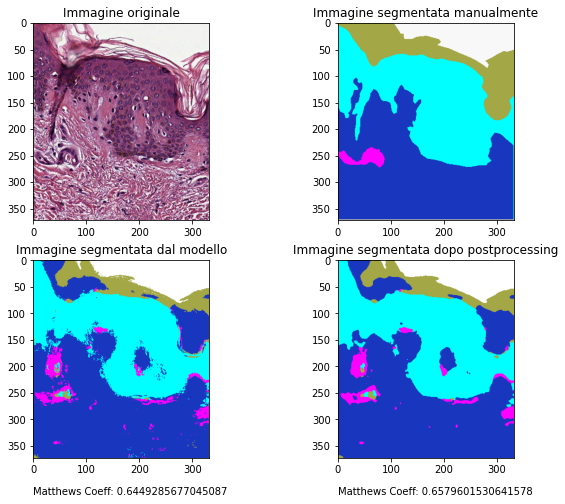

In [3]:
# Generazione dei grafici su una sola immagine di test
image_segmentation(
    rf,
    "img/pelle302R.PNG",
    "img/pelle302R_colors.PNG",
    window_size=30,
    window_size_postprocessing=6,
    feature_names=['R', 'G', 'B', 'R_mf', 'G_mf', 'B_mf', 'R_variance', 'G_variance', 'B_variance', 'entropy']
)

In [ ]:
# Riutilizziamo il modello creato prima
# ma calcoliamo il matthews coefficient medio per diverse immagini di test
mc, cm = test_on_multiple_images(knn,
                        ["img/pelle305R.PNG"],
                        ["img/pelle305R_colors.PNG"],
                        window_size=30,
                        feature_names=["h", "s", "v", "h_mf", "s_mf", "v_mf", "h_variance", "s_variance", "v_variance", "entropy"],
                        window_size_postprocessing=3)

In [1]:
def normalizza_cm(cm):
    
    new_mat = []
    
    for riga in cm:
        new_mat.append([])
        tot_riga = riga.sum()
        for v in riga:
            new_mat[-1].append(v/tot_riga)
    
    return np.array(new_mat)

In [ ]:
# Mostrare la matrice di confusione

cm_norm = normalizza_cm(cm)
labels = [None, "vetrino","strato corneo","derma","epidermide","vasi"]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm_norm, interpolation='nearest', cmap="Blues")
fig.colorbar(cax)

for (i, j), z in np.ndenumerate(cm_norm):
    ax.text(j, i, '{}'.format(str(z)[:5]), ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor="white"))

ax.set_xticklabels(labels, rotation="vertical")
ax.set_yticklabels(labels)